# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline


## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [39]:
data = pd.read_csv("peer_effects_room.csv") 
data.head()

,person,room,high_school_GPA,college_GPA
0,0,351,-1.715472,-1.285307
1,1,738,-0.530190,-0.031833
2,2,247,-0.589543,-0.203230
3,3,751,-1.303115,0.982488
4,4,698,0.156678,-0.371632


In [40]:
data2 = data.groupby('room').person.agg(['min','max']).rename(columns={'min':'person','max':'person_other'})
data2.set_index('person')

#merge new data in old creating a full dataset
merging1 = data.merge(data2, on = 'person')

#renaming the comlumns and indexing after person
data4 = data2.rename(columns={'person':'person_other','person_other':'person'})
data4.set_index('person')

#merge updated data 
merging2 = data.merge(data4, on ='person')

#assembling the data 
fulldata = pd.concat([merging1,merging2])

fulldata

,person,room,high_school_GPA,college_GPA,person_other
0,0,351,-1.715472,-1.285307,1645
1,1,738,-0.530190,-0.031833,1039
2,2,247,-0.589543,-0.203230,944
3,3,751,-1.303115,0.982488,1099
4,4,698,0.156678,-0.371632,1708
...,...,...,...,...,...
995,1995,539,-1.258312,-1.622298,728
996,1996,39,-0.038745,0.694112,1497
997,1997,990,0.790980,0.257346,1589
998,1998,69,-1.556436,-1.371018,1475


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [41]:
#adding the other persons results
df = fulldata[['person_other','high_school_GPA','college_GPA']]
df = df.rename(columns={'person_other':'person'})

#merging into full dataset
fulldata = fulldata.merge(df, on='person')
fulldata

,person,room,high_school_GPA_x,college_GPA_x,person_other,high_school_GPA_y,college_GPA_y
0,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
1,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
2,2,247,-0.589543,-0.203230,944,1.281112,-0.479543
3,3,751,-1.303115,0.982488,1099,-1.812137,-2.267394
4,4,698,0.156678,-0.371632,1708,-0.327219,0.670683
...,...,...,...,...,...,...,...
1995,1995,539,-1.258312,-1.622298,728,-0.463023,-0.393440
1996,1996,39,-0.038745,0.694112,1497,-0.042269,-0.139776
1997,1997,990,0.790980,0.257346,1589,-0.024570,0.415604
1998,1998,69,-1.556436,-1.371018,1475,-1.542693,-2.470238


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

Text(0.5, 0, 'High School GPA')

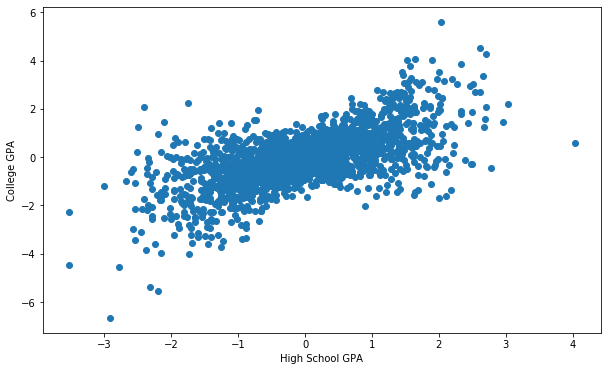

In [63]:


fig, ax = plt.subplots(figsize=[10,6])
plt.scatter(fulldata['high_school_GPA_x'],fulldata['college_GPA_x'])
plt.ylabel('College GPA')
plt.xlabel('High School GPA')


<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

Text(0, 0.5, 'Roommate GPA')

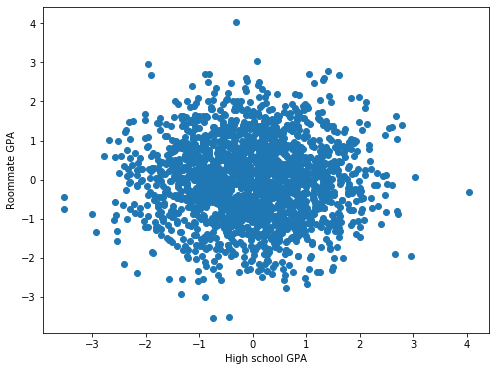

In [65]:
fig, ax = plt.subplots(figsize=[8,6])
plt.scatter(fulldata['high_school_GPA_x'],fulldata['high_school_GPA_y'])
plt.xlabel('High school GPA')
plt.ylabel('Roommate GPA')


In [58]:
reg = smf.ols('high_school_GPA_x ~ high_school_GPA_y', data=fulldata).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      high_school_GPA_x   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.788
Time:                        20:34:25   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_y    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

Text(0.5, 0, 'College GPA')

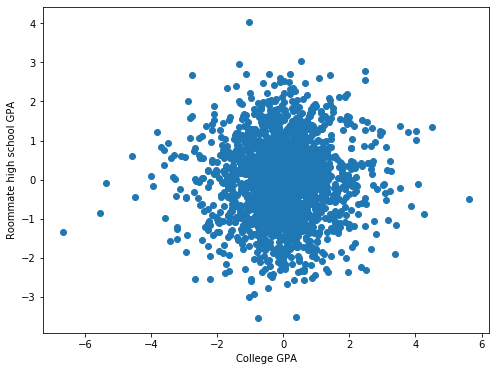

In [66]:
fig, ax = plt.subplots(figsize=[8,6])
plt.scatter(fulldata['college_GPA_x'],fulldata['high_school_GPA_y'])
plt.ylabel('Roommate high school GPA')
plt.xlabel('College GPA')


There seems to be no effect on the college gpa given the roommates highshool GPA. 

In [67]:
reg = smf.ols('college_GPA_x ~ high_school_GPA_x + high_school_GPA_y', data=fulldata).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          college_GPA_x   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Fri, 22 May 2020   Prob (F-statistic):          1.03e-223
Time:                        20:40:44   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0226      0.020     -1.147      0.252      -0.061       0.016
high_school_GPA_x     0.7059      0.019     36.606      0.000       0.668       0.744
high_school_GPA_y     0.0356      0.019      1.847      0.065      -0.002       0.073
==============================================================================
Omnibus:                       77.587   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.025
Skew:                          -0.117   Prob(JB):                     5.52e-47
Kurtosis:                       4.582   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As noted above the resutls shows that there is no correlation on the two variables. 

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [70]:
reg = smf.ols('college_GPA_x ~ high_school_GPA_x + high_school_GPA_y + college_GPA_y', data=fulldata).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          college_GPA_x   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     453.7
Date:                Fri, 22 May 2020   Prob (F-statistic):          1.02e-224
Time:                        20:50:47   Log-Likelihood:                -2580.3
No. Observations:                2000   AIC:                             5169.
Df Residuals:                    1996   BIC:                             5191.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0209      0.020     -1.063      0.288      -0.060       0.018
high_school_GPA_x     0.7032      0.019     36.530      0.000       0.665       0.741
high_school_GPA_y    -0.0176      0.025     -0.708      0.479      -0.066       0.031
college_GPA_y         0.0754      0.022      3.378      0.001       0.032       0.119
==============================================================================
Omnibus:                       79.457   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.843
Skew:                          -0.117   Prob(JB):                     6.72e-49
Kurtosis:                       4.615   Cond. No.                         2.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It appears from the ols that the college GPA of ones roommate has an effect on ones own college GPA and vice versa. 

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

They measure the peer effects and the results achieved in life based on socioeconomic factors. Exploiting the variation in classes throughout the years makes sure that there is a randomisation that ensures doesnt exist any selection bias. 

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

There must exist a selection bias of sorts in the model as parents more or less have the possibility to move their kids into new classes. There could also be a shortcoming of the gender indentification measurements as well as the social inherentence and parents expectations.

Howby (2000) tests the peer effect based on racial and gender composition.

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.